# EEG-1 Explore

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lib
from scipy.fftpack import fft, fftfreq

## Process data & Overview

In [2]:
df = pd.read_csv(r'data\Epileptic Seizure Recognition.csv')
df.drop('Unnamed', axis=1, inplace=True)

In [3]:
data_nor = df[df['y']!=1].drop('y', axis=1)
data_nor.reset_index(drop=True, inplace = True)
data_epi = df[df['y']==1].drop('y', axis=1)
data_epi.reset_index(drop=True, inplace = True)

In [4]:
timeline = np.linspace(0, 1, 178)

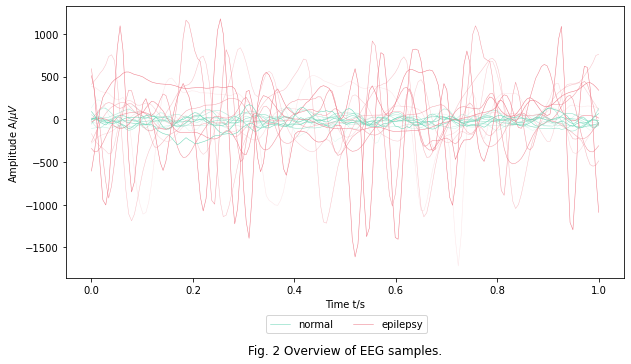

In [5]:
fig = plt.figure(figsize=(10, 5))
for i in np.arange(0, 10, 1):
    plt.plot(timeline, data_nor.iloc[i], color="#67D5B5", alpha=0.1+0.9*(i+1)/10, lw=0.5)
    plt.plot(timeline, data_epi.iloc[i], color="#EE7785", alpha=0.1+0.9*(i+1)/10, lw=0.5)

plt.plot(timeline, data_nor.iloc[10], color="#67D5B5", alpha=1, label='normal', lw=0.5)
plt.plot(timeline, data_epi.iloc[10], color="#EE7785", alpha=1, label='epilepsy', lw=0.5)
plt.xlabel('Time t/s')
plt.ylabel('Amplitude A/$\mu V$')
plt.legend(loc='center left', bbox_to_anchor=(0.35, -0.17), ncol=2)
plt.title('Fig. 2 Overview of EEG samples.', y=-.3)
plt.savefig(r'output\Fig. 2 Overview of EEG samples.', bbox_inches = 'tight', dpi=300)

In [9]:
# %matplotlib
%matplotlib inline

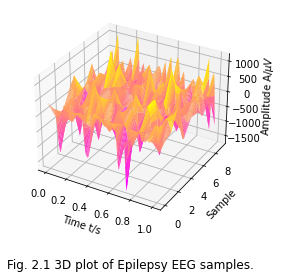

In [13]:
fig = plt.figure()
ax1 = plt.axes(projection = '3d')

x, y = np.meshgrid(timeline, np.arange(0, 10, 1)) 
z = data_epi.iloc[0:10, 0:178].values
plt.xlabel('Time t/s')
plt.ylabel('Sample')
ax1.set_zlabel('Amplitude A/$\mu V$') 
ax1.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap ='spring', edgecolor ='none')

ax1.set_title('Fig. 2.1 3D plot of Epilepsy EEG samples.', y=-0.25)
plt.savefig(r'output\Fig. 2.1 3D plot of Epilepsy EEG samples.png', bbox_inches='tight', dpi=600)

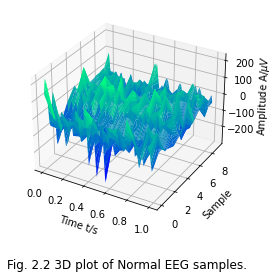

In [14]:
fig = plt.figure()
ax2 = plt.axes(projection = '3d')

x, y = np.meshgrid(timeline, np.arange(0, 10, 1)) 
z = data_nor.iloc[0:10, 0:178].values
plt.xlabel('Time t/s')
plt.ylabel('Sample')
ax2.set_zlabel('Amplitude A/$\mu V$') 
ax2.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap ='winter', edgecolor ='none')

ax2.set_title('Fig. 2.2 3D plot of Normal EEG samples.', y=-0.25)
plt.savefig(r'output\Fig. 2.2 3D plot of Normal EEG samples.png', bbox_inches='tight', dpi=600)

## Fig.3.2.1 Supply

In [8]:
def FFT(y):
    fs = 178
    # signal
    t = np.linspace(0, 1, 178)
    N = len(t)
    # fft
    yf = fft(y)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
    xf_half = xf[:len(yf_nor)]
    return yf_nor 

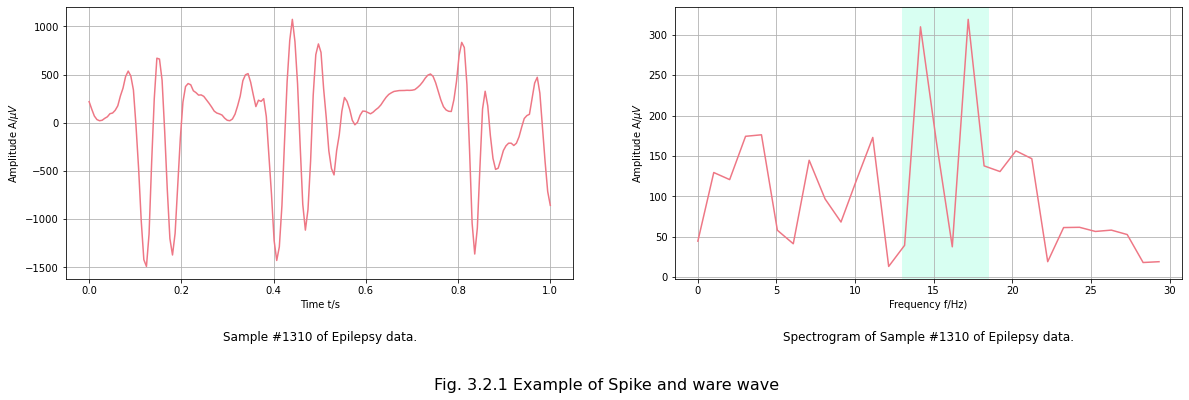

In [57]:
fig, ax =  plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(np.linspace(0, 1, 178), np.array(data_epi.iloc[1310]), color="#EE7785")
ax[0].set_xlabel('Time t/s')
ax[0].set_ylabel('Amplitude A/$\mu V$')
ax[0].set_title('Sample #1310 of Epilepsy data.', y=-0.25)
ax[0].grid()

ax[1].plot(np.linspace(0, 89, 89)[0:30], FFT(np.array(data_epi.iloc[1310]))[0:30], color="#EE7785")
ax[1].set_xlabel('Frequency f/Hz)')
ax[1].set_ylabel('Amplitude A/$\mu V$')
ax[1].set_title('Spectrogram of Sample #1310 of Epilepsy data.', y=-0.25)
ax[1].axvspan(xmin=13, xmax=18.5, facecolor="aquamarine", alpha=0.3)
ax[1].grid()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig. 3.2.1 Example of Spike and ware wave', y=-.15, fontsize=16)
plt.savefig(r'output\Fig. 3.2.1 Example of Spike and ware wave.png', bbox_inches='tight', dpi=300)

## Fig. 3.3.1 Supply

In [44]:
data_nor_N = data_nor.sub(data_nor.mean(axis=1), axis=0)
data_nor_pos = data_nor_N[data_nor_N > 0]
data_nor_neg = data_nor_N[data_nor_N < 0]
data_nor_pospeek = data_nor_N.sub(1.5*data_nor_pos.mean(axis=1), axis=0)
data_nor_negpeek = data_nor_N.sub(1.5*data_nor_neg.mean(axis=1), axis=0)



data_epi_N = data_epi.sub(data_epi.mean(axis=1), axis=0)
data_epi_pos = data_epi_N[data_epi_N > 0]
data_epi_neg = data_epi_N[data_epi_N < 0]
data_epi_pospeek = data_epi_N.sub(1.5*data_epi_pos.mean(axis=1), axis=0)
data_epi_negpeek = data_epi_N.sub(1.5*data_epi_neg.mean(axis=1), axis=0)

def nor_SUM_peek(i):
    pospeek = lib.zero_crossings(np.array(data_nor_pospeek.iloc[i]))
    negpeek = lib.zero_crossings(np.array(data_nor_negpeek.iloc[i]))
    return max(np.sum(pospeek==1), np.sum(negpeek==1))

def epi_SUM_peek(i):
    pospeek = lib.zero_crossings(np.array(data_epi_pospeek.iloc[i]))
    negpeek = lib.zero_crossings(np.array(data_epi_negpeek.iloc[i]))
    return max(np.sum(pospeek==1), np.sum(negpeek==1))

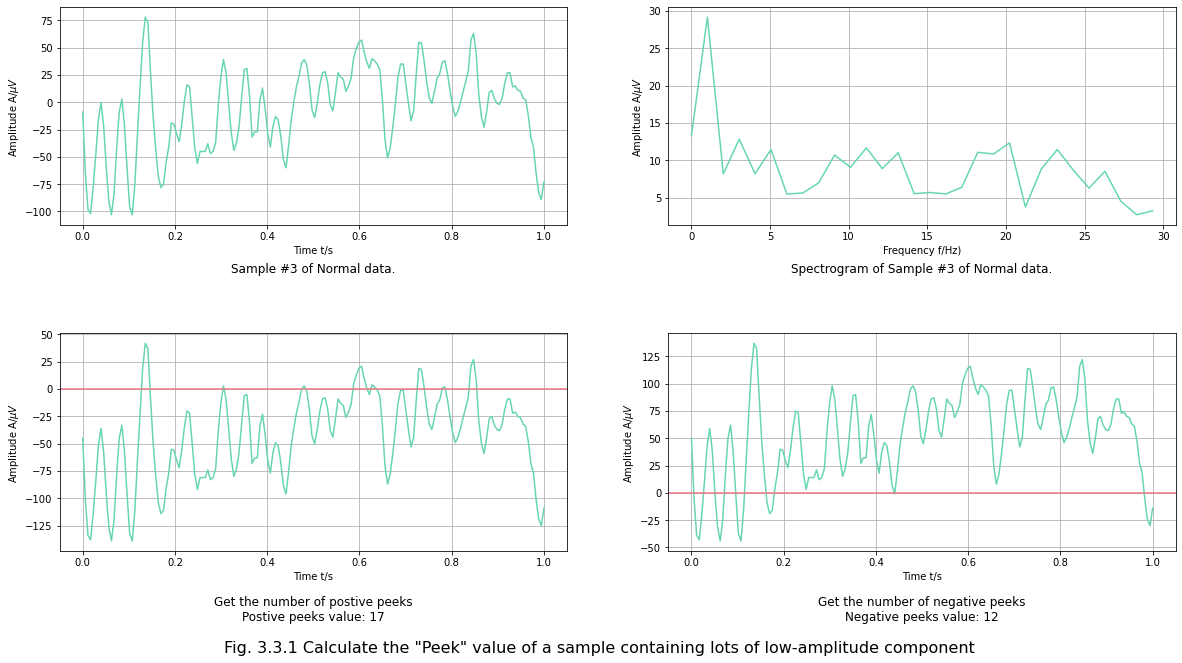

In [70]:
fig, ax =  plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].plot(np.linspace(0, 1, 178), np.array(data_nor.iloc[3]), color="#67D5B5")
ax[0][0].set_xlabel('Time t/s')
ax[0][0].set_ylabel('Amplitude A/$\mu V$')
ax[0][0].set_title('Sample #3 of Normal data.', y=-0.25)
ax[0][0].grid()

ax[0][1].plot(np.linspace(0, 89, 89)[0:30], FFT(np.array(data_nor.iloc[3]))[0:30], color="#67D5B5")
ax[0][1].set_xlabel('Frequency f/Hz)')
ax[0][1].set_ylabel('Amplitude A/$\mu V$')
ax[0][1].set_title('Spectrogram of Sample #3 of Normal data.', y=-0.25)
ax[0][1].grid()

ax[1][0].plot(np.linspace(0, 1, 178), data_nor_pospeek.iloc[3], color="#67D5B5")
ax[1][0].axhline(y=0, color='#EE7785')
ax[1][0].set_xlabel('Time t/s')
ax[1][0].set_ylabel('Amplitude A/$\mu V$')
ax[1][0].set_title('Get the number of postive peeks\nPostive peeks value: {}'.format(np.sum(lib.zero_crossings(np.array(data_nor_pospeek.iloc[3]))==1)), y=-0.35)
ax[1][0].grid()

ax[1][1].plot(np.linspace(0, 1, 178), data_nor_negpeek.iloc[3], color="#67D5B5")
ax[1][1].axhline(y=0, color='#EE7785')
ax[1][1].set_xlabel('Time t/s')
ax[1][1].set_ylabel('Amplitude A/$\mu V$')
ax[1][1].set_title('Get the number of negative peeks\nNegative peeks value: {}'.format(np.sum(lib.zero_crossings(np.array(data_nor_negpeek.iloc[3]))==1)), y=-0.35)
ax[1][1].grid()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig. 3.3.1 Calculate the "Peek" value of a sample containing lots of low-amplitude component', y=0, fontsize=16)
plt.savefig(r'output\Fig. 3.3.1 Calculate the Peek value of a sample containing lots of low-amplitude component.png', bbox_inches='tight', dpi=300)